## Summary

The data set can be found in this link: https://www.kaggle.com/terminus7/pokemon-challenge

The outcome variable will be HP, since we can assume that most of the time, higher HP means stronger/higher attributes for the Pokemon in general.  The two categorical variables will be the "Type 1" and "Type 2" columns.  The four continuous variables to work with will be "Attack," "Defense," "Sp. Atk," and "Sp. Def."  We will still leave the "Name" column in so we can identify which Pokemon it is we are working with.  With this, we should be ready to set up for the feature selection.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

# Import the data
df = pd.read_csv('pokemon.csv')

# Remove extra variables not specified in the summary
df = df.drop(columns=['#', 'Speed', 'Generation', 'Legendary'])

# Rename the columns so there is no space or others
df.columns = df.columns.str.replace('\s+', '_')
df.columns = df.columns.str.replace('.', '')

print(df)

                       Name    Type_1  Type_2   HP  Attack  Defense  Sp_Atk  \
0                 Bulbasaur     Grass  Poison   45      49       49      65   
1                   Ivysaur     Grass  Poison   60      62       63      80   
2                  Venusaur     Grass  Poison   80      82       83     100   
3             Mega Venusaur     Grass  Poison   80     100      123     122   
4                Charmander      Fire     NaN   39      52       43      60   
5                Charmeleon      Fire     NaN   58      64       58      80   
6                 Charizard      Fire  Flying   78      84       78     109   
7          Mega Charizard X      Fire  Dragon   78     130      111     130   
8          Mega Charizard Y      Fire  Flying   78     104       78     159   
9                  Squirtle     Water     NaN   44      48       65      50   
10                Wartortle     Water     NaN   59      63       80      65   
11                Blastoise     Water     NaN   79  

## Section 1: Univariate Method
Here we want to explore the univariate method.  Below are a few of the results shown in which we will use to answer the following questions below:
### How many variables do I have?
This can be seen in the result that used count method.  We have a total of 800 variables.
### How many datapoints?
Datapoints stand for the measurements that we are using, which should be a total of seven different datapoints.
### Which variables are continuous (having an infinite number of possible values, such as age) and which are categorical (having a limited number of values, such as gender).
The two categorical variables will be the "Type 1" and "Type 2" columns.  The four continuous variables to work with will be "Attack," "Defense," "Sp. Atk," and "Sp. Def."
### Do any of my variables have a known probability distribution (normal, Poisson, Gamma, etc)?
The graphs below show they are mostly normal distributions that are right skewed.
### Do I have missing data? If so, how much?
386 values are missing from the Type 2 column, presumably because there simply is no measurement of it for those Pokemons.
### How much variance is there in each of my variables?
This is described in the one of the results for this section.

In [3]:
df.head() # List top five rows

,Name,Type_1,Type_2,HP,Attack,Defense,Sp_Atk,Sp_Def
0,Bulbasaur,Grass,Poison,45,49,49,65,65
1,Ivysaur,Grass,Poison,60,62,63,80,80
2,Venusaur,Grass,Poison,80,82,83,100,100
3,Mega Venusaur,Grass,Poison,80,100,123,122,120
4,Charmander,Fire,NaN,39,52,43,60,50


In [4]:
df.tail(10) # list last ten rows

,Name,Type_1,Type_2,HP,Attack,Defense,Sp_Atk,Sp_Def
790,Noibat,Flying,Dragon,40,30,35,45,40
791,Noivern,Flying,Dragon,85,70,80,97,80
792,Xerneas,Fairy,NaN,126,131,95,131,98
793,Yveltal,Dark,Flying,126,131,95,131,98
794,Zygarde Half Forme,Dragon,Ground,108,100,121,81,95
795,Diancie,Rock,Fairy,50,100,150,100,150
796,Mega Diancie,Rock,Fairy,50,160,110,160,110
797,Hoopa Confined,Psychic,Ghost,80,110,60,150,130
798,Hoopa Unbound,Psychic,Dark,80,160,60,170,130
799,Volcanion,Fire,Water,80,110,120,130,90


In [5]:
df.count() # Count how many variables I have

Name       799
Type_1     800
Type_2     414
HP         800
Attack     800
Defense    800
Sp_Atk     800
Sp_Def     800
dtype: int64

In [6]:
df.nunique() # Return number of unique variables I have

Name       799
Type_1      18
Type_2      18
HP          94
Attack     111
Defense    103
Sp_Atk     105
Sp_Def      92
dtype: int64

In [7]:
df.describe() # Make a summry of important data

,HP,Attack,Defense,Sp_Atk,Sp_Def
count,800.000000,800.000000,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500,72.820000,71.902500
std,25.534669,32.457366,31.183501,32.722294,27.828916
min,1.000000,5.000000,5.000000,10.000000,20.000000
25%,50.000000,55.000000,50.000000,49.750000,50.000000
50%,65.000000,75.000000,70.000000,65.000000,70.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000


In [8]:
df.var() # Return unbiased variance over requested axis

HP          652.019323
Attack     1053.480599
Defense     972.410707
Sp_Atk     1070.748536
Sp_Def      774.448554
dtype: float64

Text(0.5,1,'Counts of Special Defense')

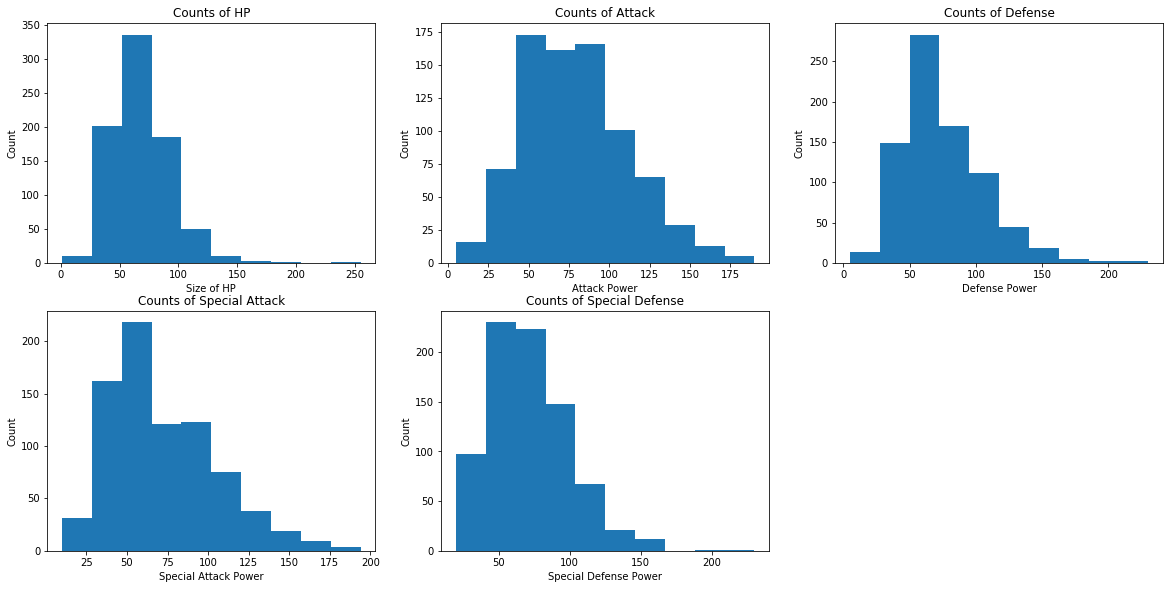

In [9]:
# Plot some comparisons so we know the distribution
plt.figure(figsize=(20, 15))

plt.subplot(3, 3, 1)
plt.hist(df.HP)
plt.ylabel('Count')
plt.xlabel('Size of HP')
plt.title('Counts of HP')

plt.subplot(3, 3, 2)
plt.hist(df.Attack)
plt.ylabel('Count')
plt.xlabel('Attack Power')
plt.title('Counts of Attack')

plt.subplot(3, 3, 3)
plt.hist(df.Defense)
plt.ylabel('Count')
plt.xlabel('Defense Power')
plt.title('Counts of Defense')

plt.subplot(3, 3, 4)
plt.hist(df.Sp_Atk)
plt.ylabel('Count')
plt.xlabel('Special Attack Power')
plt.title('Counts of Special Attack')

plt.subplot(3, 3, 5)
plt.hist(df.Sp_Def)
plt.ylabel('Count')
plt.xlabel('Special Defense Power')
plt.title('Counts of Special Defense')

## Section 2: Bivariate Method
Here we want to explore the bivariate method.

               HP    Attack   Defense    Sp_Atk    Sp_Def
HP       1.000000  0.422386  0.239622  0.362380  0.378718
Attack   0.422386  1.000000  0.438687  0.396362  0.263990
Defense  0.239622  0.438687  1.000000  0.223549  0.510747
Sp_Atk   0.362380  0.396362  0.223549  1.000000  0.506121
Sp_Def   0.378718  0.263990  0.510747  0.506121  1.000000


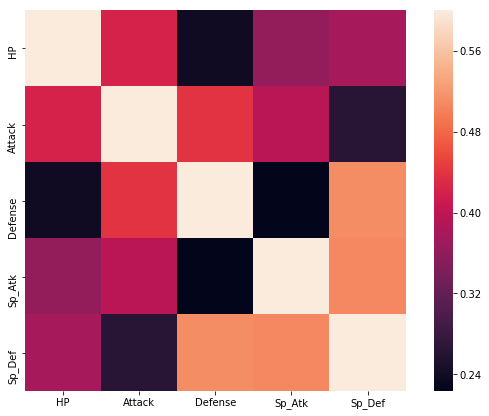

In [10]:
# Make the correlation matrix
corrmat = df.corr()
print(corrmat)

# Set up matplotlib figure.
f, ax = plt.subplots(figsize=(10, 7))

# Draw heatmap with seaborn
sns.heatmap(corrmat, vmax=.6, square=True)
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


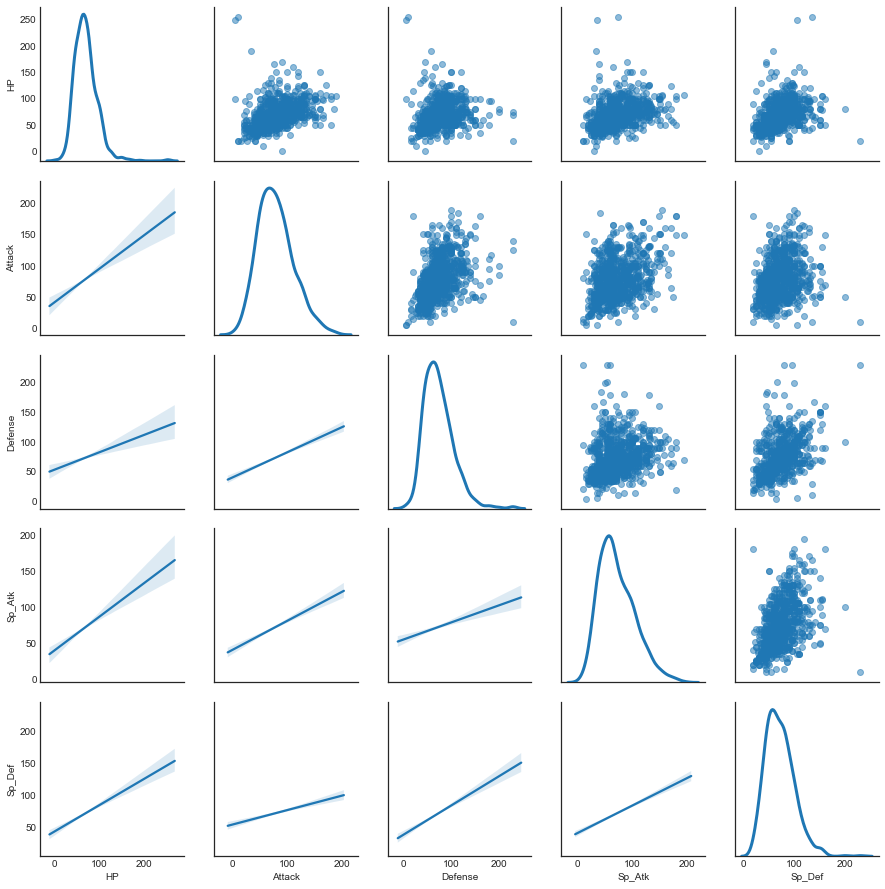

In [11]:
# Make scatterplot matrix
sns.set_style("white")

# Make a copy of the data to add jitter to and plot.\
# Get rid of blanks
df_jittered = df.loc[:, 'HP':'Sp_Def'].dropna()
#print(df_jittered)

# Make random noise
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)
# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

### Section 3: Ten New Features
We want to figure out how to plot out the categorical data.  We will focus on the "Elemental," which should contain the three main elements in the world of Pokemon: Fire, Grass, and Water.

In [30]:
# Take a subset of the data to make plots clearer.
print(df.head())

print(df.Type_1.unique())
print(df.Type_2.unique())

            Name Type_1  Type_2  HP  Attack  Defense  Sp_Atk  Sp_Def
0      Bulbasaur  Grass  Poison  45      49       49      65      65
1        Ivysaur  Grass  Poison  60      62       63      80      80
2       Venusaur  Grass  Poison  80      82       83     100     100
3  Mega Venusaur  Grass  Poison  80     100      123     122     120
4     Charmander   Fire     NaN  39      52       43      60      50
['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal']


In [31]:
# Making dummies.
# Also creating a data frame to hold our features.
features = pd.get_dummies(df['Type_1'])

# Nordic countries dummy.
features['Elemental'] = np.where((df['Type_1'].isin(['Fire', 'Water', 'Grass'])), 1, 0)

print(pd.crosstab(features['Elemental'], df['Type_1']))

Type_1     Bug  Dark  Dragon  Electric  Fairy  Fighting  Fire  Flying  Ghost  \
Elemental                                                                      
0           69    31      32        44     17        27     0       4     32   
1            0     0       0         0      0         0    52       0      0   

Type_1     Grass  Ground  Ice  Normal  Poison  Psychic  Rock  Steel  Water  
Elemental                                                                   
0              0      32   24      98      28       57    44     27      0  
1             70       0    0       0       0        0     0      0    112  


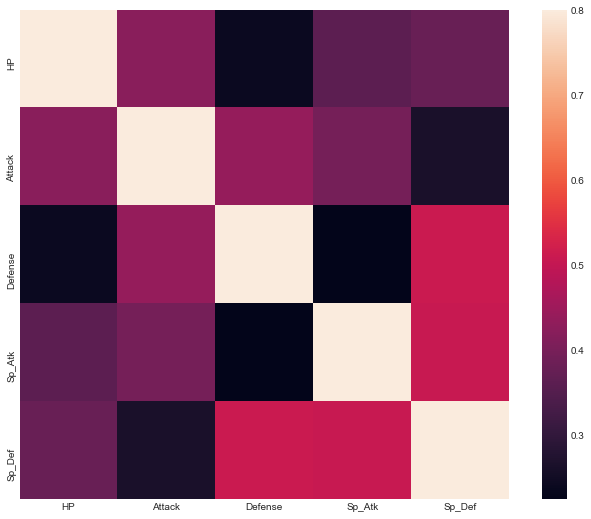

                   Attack    Sp_Atk  trust_fair_help
Attack           1.000000  0.396362         0.835572
Sp_Atk           0.396362  1.000000         0.835572
trust_fair_help  0.835572  0.835572         1.000000


In [32]:
corrmat = df.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

# Focus on the redundant attack
means = df[['Attack','Sp_Atk']].mean(axis=0)
stds = df[['Attack','Sp_Atk']].std(axis=0)
features['trust_fair_help'] = ((df[['Attack','Sp_Atk']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = df.loc[:, ['Attack','Sp_Atk']]
plotdf['trust_fair_help'] = features['trust_fair_help'] 
corrmat2 = plotdf.corr()

print(corrmat2)

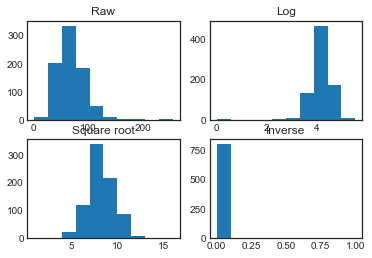

In [36]:
# Making a four-panel plot.
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['HP'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['HP'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['HP'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['HP'].dropna())
plt.title('Inverse')
plt.show()

# None of these transformations look particularly great, actually. But let's
# make a feature from the log one.

features['log_hp'] = np.log(df['HP'])

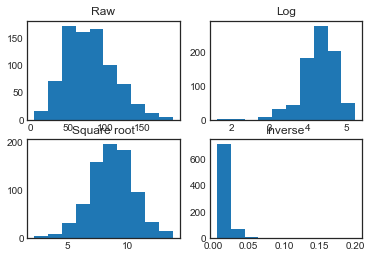

In [37]:
# Making a four-panel plot.
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['Attack'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['Attack'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['Attack'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['Attack'].dropna())
plt.title('Inverse')
plt.show()

# None of these transformations look particularly great, actually. But let's
# make a feature from the log one.

features['log_attack'] = np.log(df['Attack'])

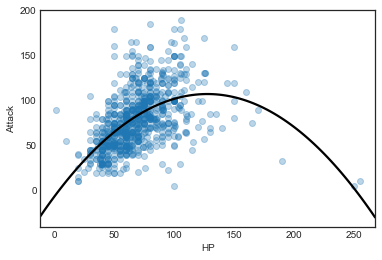

In [46]:
sns.regplot(
    df['HP'],
    y=df['Attack'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

features['hp_atk'] = df['HP'] * df['HP']

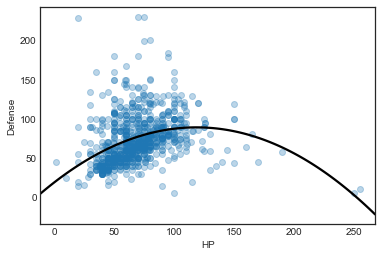

In [45]:
sns.regplot(
    df['HP'],
    y=df['Defense'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

features['hp_def'] = df['HP'] * df['HP']

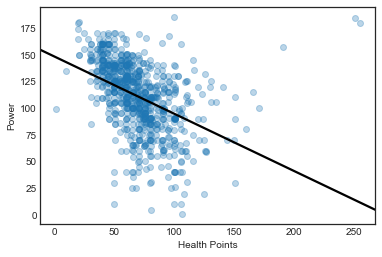

In [52]:
# Reverse coding so that we think power comes from higher attack

features['Power'] = max(df['Attack']) - df['Attack']

sns.regplot(
    df['HP'],
    features['Power'],
    x_jitter=.49,
    y_jitter=.49,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.xlabel('Health Points')
plt.ylabel('Power')
plt.show()

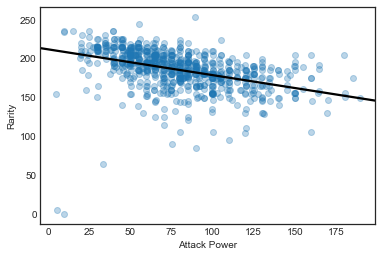

In [56]:
# Reverse coding so that we think better Pokemon comes from higher HP

features['Rarity'] = max(df['HP']) - df['HP']

sns.regplot(
    df['Attack'],
    features['Rarity'],
    x_jitter=.49,
    y_jitter=.49,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.xlabel('Attack Power')
plt.ylabel('Rarity')
plt.show()

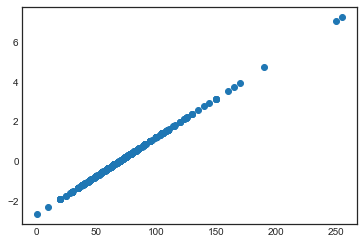

In [62]:
from sklearn import preprocessing

# Select only numeric variables to scale.
df_num = df.select_dtypes(include=[np.number]).dropna()

# Save the column names.
names=df_num.columns

# Scale, then turn the resulting numpy array back into a data frame with the
# correct column names.
df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)

# The new features contain all the information of the old ones, but on a new scale.
plt.scatter(df_num['HP'], df_scaled['HP'])
plt.show()

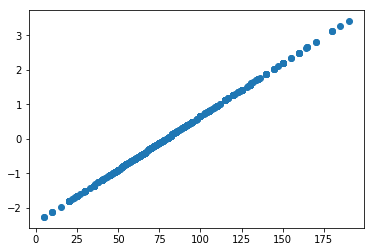

                 HP        Attack       Defense        Sp_Atk        Sp_Def
count  8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02
mean  -2.660372e-16 -1.355860e-16  2.498002e-17  2.120526e-16 -1.171285e-16
std    1.000626e+00  1.000626e+00  1.000626e+00  1.000626e+00  1.000626e+00
min   -2.674852e+00 -2.281379e+00 -2.209039e+00 -1.920993e+00 -1.866223e+00
25%   -7.546915e-01 -7.399327e-01 -7.650653e-01 -7.054650e-01 -7.875334e-01
50%   -1.668874e-01 -1.233542e-01 -1.232993e-01 -2.391303e-01 -6.840691e-02
75%    4.209167e-01  6.473688e-01  5.184667e-01  6.782494e-01  6.507196e-01
max    7.278632e+00  3.421972e+00  5.010829e+00  3.705602e+00  5.684605e+00


In [7]:
from sklearn import preprocessing

# Select only numeric variables to scale.
df_num = df.select_dtypes(include=[np.number]).dropna()

# Save the column names.
names=df_num.columns

# Scale, then turn the resulting numpy array back into a data frame with the
# correct column names.
df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)

# The new features contain all the information of the old ones, but on a new scale.
plt.scatter(df_num['Attack'], df_scaled['Attack'])
plt.show()

# Means and SD
print(df_scaled.describe())

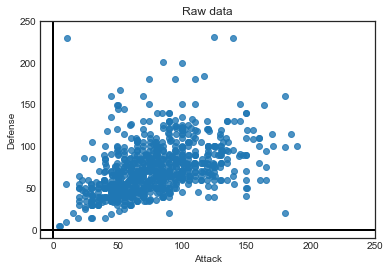

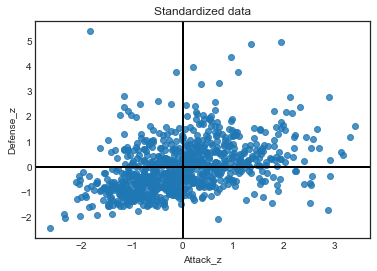

In [2]:
# Set up PCA componenets here
sns.set_style("white")

# Use all of dataset to do the calculation
#Cut df to 3 variables to put into PCA
#you are actually making new variables, the program will do it for you
#Do PCA first then do eigenvalue and eigenvector must be calculated by hand
#** just select all of the df to do it.

# This one plots out all the points you're comparing
t = sns.regplot(
    'Attack',
    'Defense',
    df,
    x_jitter=.39,
    y_jitter=.39,
    fit_reg=False
)
t.set(xlim=(-10, 250), ylim=(-10, 250))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

# Here you are standardizing variables by subtracting the mean and dividing by the standard
# deviation.  Put both variables on same scale.
df['Attack_z'] = (df['Attack'] - df['Attack'].mean()) / df['Attack'].std()
df['Defense_z'] = (df['Defense'] - df['Defense'].mean()) / df['Defense'].std()

t = sns.regplot(
    'Attack_z',
    'Defense_z',
    df,
    x_jitter=.39,
    y_jitter=.39,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()

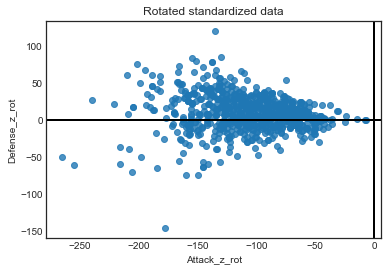

In [3]:
# Rotating the data so that the axes roughly match to vector above.
df['Attack_z_rot'] = math.cos(40) * df['Attack'] - math.sin(40) * df['Defense']
df['Defense_z_rot'] = math.sin(40) * df['Attack'] + math.cos(40) * df['Defense']

t = sns.regplot(
    'Attack_z_rot',
    'Defense_z_rot',
    df,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Rotated standardized data')
plt.show()


In [17]:
# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.

#data = [df['HP'],df['Attack'],df['Defense'],df['Sp_Atk'],df['Sp_Def']]
data = [df['Attack'][:10],df['Sp_Atk'][:10]]
X = StandardScaler().fit_transform(data)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[2. 2. 2. 2. 2. 2. 2. 0. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 0. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 0. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 0. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 0. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 0. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 0. 2. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 0. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 0. 2. 2.]]


In [18]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 10).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[-0.94280904]
 [ 0.11785113]
 [ 0.11785113]
 [ 0.11785113]
 [ 0.11785113]
 [ 0.11785113]
 [ 0.11785113]
 [ 0.        ]
 [ 0.11785113]
 [ 0.11785113]]
Eigenvalue 1: -1.7763568394002505e-15
----------------------------------------
Eigenvector 2: 
[[0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.33333333]
 [0.        ]
 [0.33333333]
 [0.33333333]]
Eigenvalue 2: 18.0
----------------------------------------
Eigenvector 3: 
[[ 4.05337806e-16]
 [-9.35414347e-01]
 [ 1.33630621e-01]
 [ 1.33630621e-01]
 [ 1.33630621e-01]
 [ 1.33630621e-01]
 [ 1.33630621e-01]
 [ 0.00000000e+00]
 [ 1.33630621e-01]
 [ 1.33630621e-01]]
Eigenvalue 3: 3.8227122373854554e-31
----------------------------------------
Eigenvector 4: 
[[ 1.37199347e-16]
 [ 2.67390383e-16]
 [ 9.25820100e-01]
 [-1.54303350e-01]
 [-1.54303350e-01]
 [-1.54303350e-01]
 [-1.54303350e-01]
 [ 0.00000000e+00]
 [-1.54303350e-01]
 [-1.54303350e-01]]
Eigenvalue 4: -2.1895288505075267e-47
-------

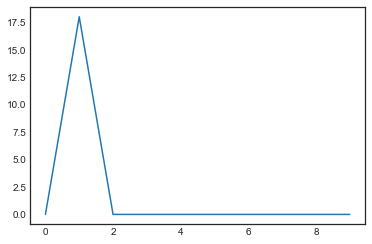

In [19]:
plt.plot(eig_val_cov)
plt.show()

C:\Users\nyejy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


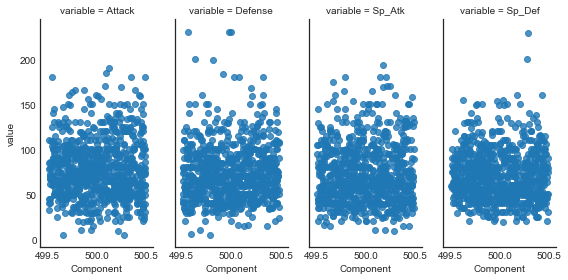

In [20]:
# Create P, which we will use to transform Cx into Cy to get Y, the
# dimensionally-reduced representation of X.
P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = 500

# Combine X and Y for plotting purposes.
data_to_plot = df[['Attack', 'Defense', 'Sp_Atk', 'Sp_Def']]
data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')

g = sns.FacetGrid(data_to_plot, col="variable", size=4, aspect=.5)
g = g.map(
    sns.regplot,
    "Component",
    "value",
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
plt.show()

The five best features are the two different linear relationships, non-normality, normalized feature using sklearn, and the Principal Components Analysis (PCA).  PCA works by determining correlation and relationships between variables.